![LogoUC3M](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a6/Acr%C3%B3nimo_y_nombre_de_la_UC3M.svg/320px-Acr%C3%B3nimo_y_nombre_de_la_UC3M.svg.png)

*GRUPO 21 | Alonso Rios Guerra - 100495821 | Guillermo Sancho González - 100495991 | GitHub: https://github.com/100495991/AA_practica2*



# *__Aprendizaje automático P2: Clustering de semillas__*

## *__1. Introducción__*

krr paw paw

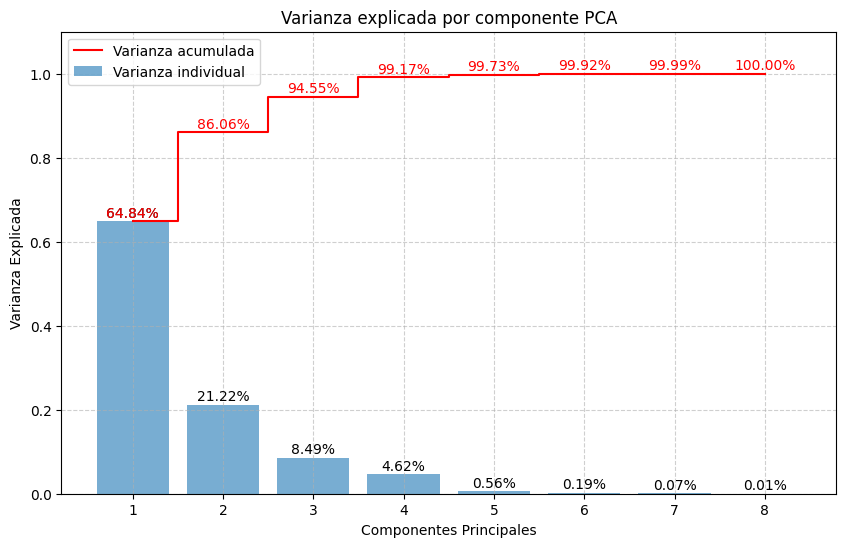

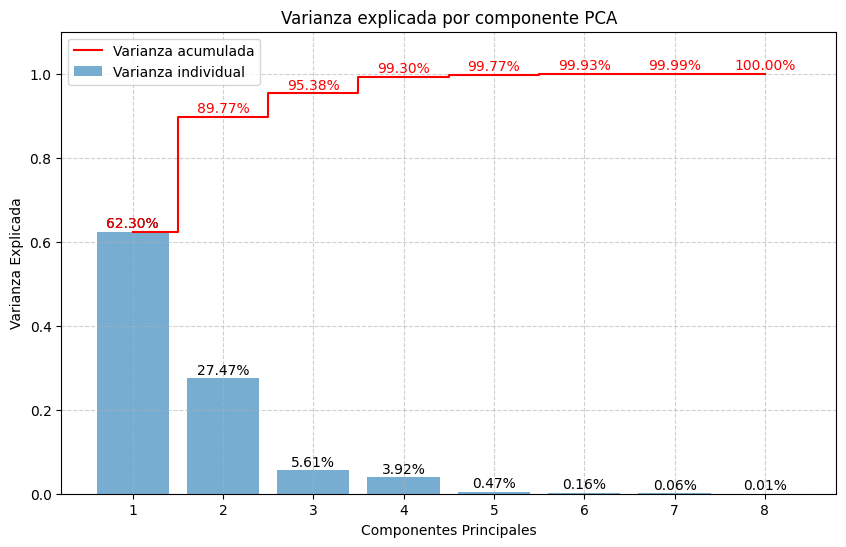

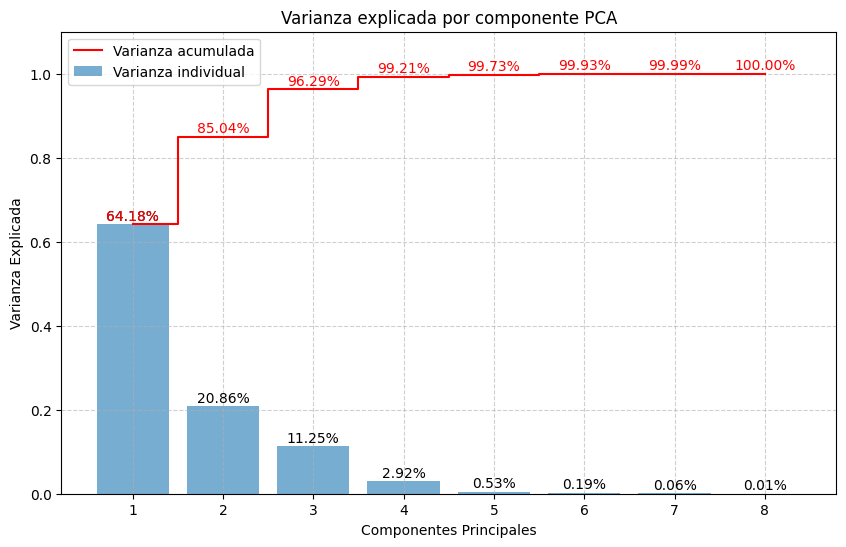

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import numpy as np
import pandas as pd

data_path = 'semillas.csv'

data = pd.read_csv(data_path, sep = ',')

X = data

for scaler in (StandardScaler(), MinMaxScaler(), RobustScaler()):
    pipeline = Pipeline([
    ('scaler', scaler),  # Siempre escalar antes de PCA
    ('pca', PCA())
    ])

    # Ajustar y transformar
    X_reduced = pipeline.fit_transform(X)
    pca = pipeline.named_steps['pca']

    # Varianza explicada y acumulada
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)

    # 1. Plot de Varianza Explicada y Acumulada
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, label='Varianza individual')
    plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Varianza acumulada', color='red')

    # Añadir valores exactos
    for i, (ev, cv) in enumerate(zip(explained_variance, cumulative_variance)):
        plt.text(i + 1, ev + 0.01, f"{ev:.2%}", ha='center')
        plt.text(i + 1, cv + 0.01, f"{cv:.2%}", ha='center', color='red')

    plt.xlabel('Componentes Principales')
    plt.ylabel('Varianza Explicada')
    plt.title('Varianza explicada por componente PCA')
    plt.legend(loc='best')
    plt.ylim(0, 1.1)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

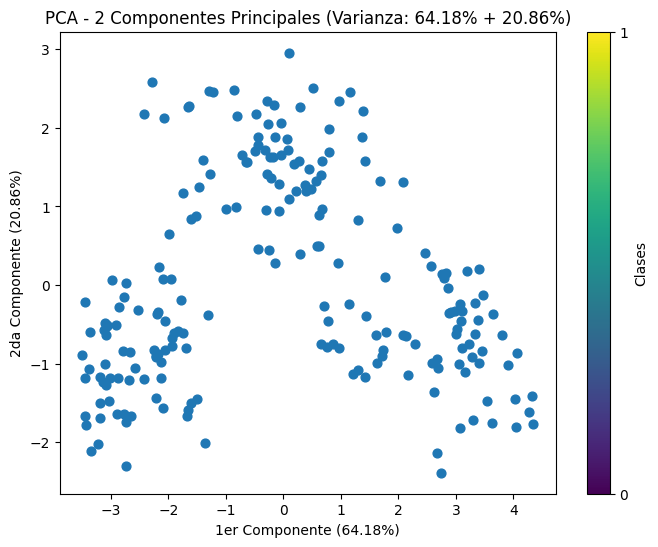

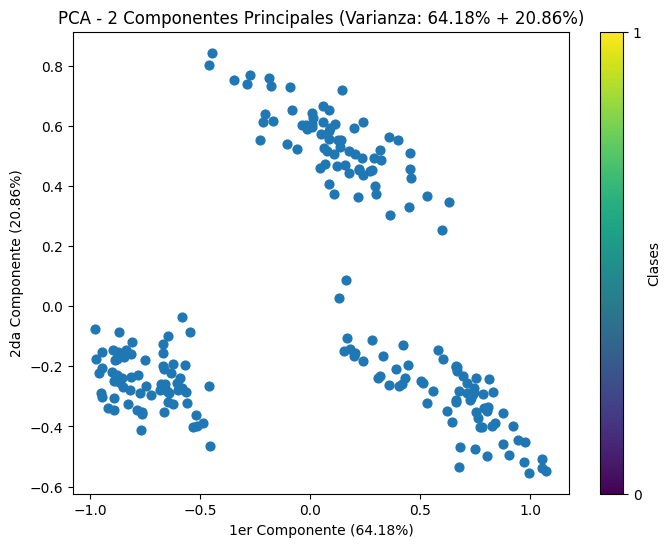

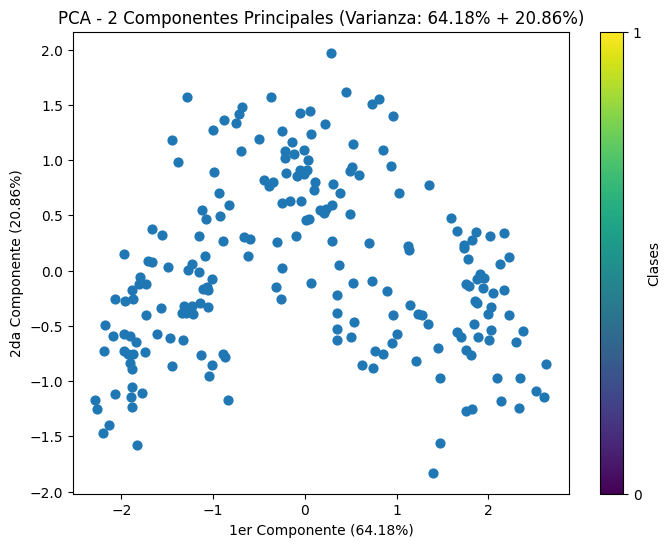

In [ ]:
for scaler in (StandardScaler(), MinMaxScaler(), RobustScaler()):
    pipeline = Pipeline([
        ('scaler', scaler),  # Siempre escalar antes de PCA
        ('pca', PCA(n_components=4))
    ])

    # Transformar
    X_reduced = pipeline.fit_transform(X)
    pca = pipeline.named_steps['pca']

    # Visualizar
    plt.figure(figsize=(8, 6))
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], s=40)
    plt.title('PCA - 2 Componentes Principales (Varianza: {:.2%} + {:.2%})'.format(explained_variance[0], explained_variance[1]))
    plt.xlabel('1er Componente ({:.2%})'.format(explained_variance[0]))
    plt.ylabel('2da Componente ({:.2%})'.format(explained_variance[1]))
    plt.colorbar(ticks=range(3), label='Clases')
    plt.show()

c:\Users\Guillermo\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\collections.py:1121: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


AttributeError: 'DataFrame' object has no attribute 'target_names'

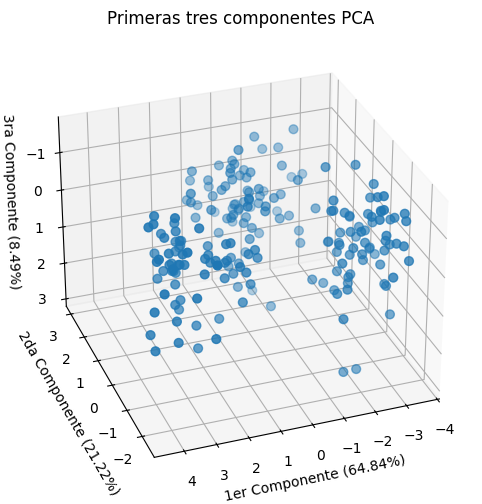

In [15]:
for scalre in (StandardScaler(), MinMaxScaler(), RobustScaler()):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Siempre escalar antes de PCA
        ('pca', PCA(n_components=4))
    ])

    # Transformar
    X_reduced = pipeline.fit_transform(X)
    pca = pipeline.named_steps['pca']

    # Visualizar
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

    scatter = ax.scatter(
        X_reduced[:, 0],
        X_reduced[:, 1],
        X_reduced[:, 2],
        s=40
    )

    ax.set(
        title="Primeras tres componentes PCA",
        xlabel="1er Componente ({:.2f}%)".format(pca.explained_variance_ratio_[0]*100),
        ylabel="2da Componente ({:.2f}%)".format(pca.explained_variance_ratio_[1]*100),
        zlabel="3ra Componente ({:.2f}%)".format(pca.explained_variance_ratio_[2]*100)
    )

    # Leyenda
    legend1 = ax.legend(
        scatter.legend_elements()[0],
        X.target_names.tolist(),
        loc="upper right",
        title="Clases"
    )
    ax.add_artist(legend1)

    plt.show()